In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [83]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [84]:
boston = load_boston()
X = boston.data
Y = boston.target
print(np.shape(X))
print(np.shape(Y))
print(type(X))

(506, 13)
(506,)
<class 'numpy.ndarray'>


In [85]:
std = StandardScaler()
X = std.fit_transform(X)

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=66)

In [87]:
## 定义模型
class RegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, 100)
        self.linear2 = nn.Linear(100, output_dim)
        
    def forward(self, x):
        x = self.linear(x)
        x = f.relu(x)
        out = self.linear2(x)
        return out
# 模型实例化
input_dim = 13
output_dim = 1
model = RegressionModel(input_dim, output_dim)
print(model)
## 定义损失函数和优化器
learning_rate = 0.0001
criterion = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = learning_rate)

RegressionModel(
  (linear): Linear(in_features=13, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


In [88]:
# help(torch.nn.MSELoss)

In [89]:

#数据转为tensor类型
# inputs = torch.as_tensor(torch.from_numpy(X_train),dtype=torch.float32)
# labels = torch.as_tensor(torch.from_numpy(Y_train),dtype=torch.float32)
inputs = torch.tensor(X_train,dtype=torch.float32)
labels = torch.tensor(Y_train,dtype=torch.float32)


#测试集进行测试
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(Y_test, dtype = torch.float32)

epochs = 20000
test_min_loss = 1000000
all_train_loss = []
all_test_loss = []
for epoch in range(epochs):

    
    #前向传播
    outputs = model(inputs)
    
    #计算loss
    
    loss = criterion(outputs, labels.view(-1,1))
    all_train_loss.append(loss.item())
    #测试集#在backward之前计算测试数据的loss
    pred = model.forward(x_test)
    test_loss = criterion(pred, y_test.view(-1,1))
    all_test_loss.append(test_loss.item())

    if test_min_loss > test_loss.item():
        test_min_loss = test_loss.item()
    else:
        print(f'程序结束时的测试数据的最小loss:{test_min_loss},当前模型测试数据的loss:{test_loss.item()}')
        break
    if epoch % 100 == 0:
#             print('epoch {}, train_loss {},test_loss {}'.format(epoch, loss.item(),loss_test.item()))
        print(f'epoch: {epoch}, train_loss: {loss.item()}, test_loss: {test_loss.item()}')
    #梯度清零
    optimizer.zero_grad()

    #反向传播
    loss.backward()

    #更新参数
    optimizer.step() 

epoch: 0, train_loss: 601.3571166992188, test_loss: 610.4064331054688
epoch: 100, train_loss: 585.7545166015625, test_loss: 594.1322631835938
epoch: 200, train_loss: 569.34912109375, test_loss: 576.8253784179688
epoch: 300, train_loss: 550.6537475585938, test_loss: 556.7950439453125
epoch: 400, train_loss: 528.9808349609375, test_loss: 533.206787109375
epoch: 500, train_loss: 503.9185485839844, test_loss: 505.72698974609375
epoch: 600, train_loss: 475.37841796875, test_loss: 474.3448486328125
epoch: 700, train_loss: 443.6724548339844, test_loss: 439.4716491699219
epoch: 800, train_loss: 409.5365905761719, test_loss: 401.9920959472656
epoch: 900, train_loss: 373.9753723144531, test_loss: 363.0768737792969
epoch: 1000, train_loss: 338.03106689453125, test_loss: 324.1041564941406
epoch: 1100, train_loss: 302.83319091796875, test_loss: 286.4101867675781
epoch: 1200, train_loss: 269.25762939453125, test_loss: 250.92088317871094
epoch: 1300, train_loss: 237.95741271972656, test_loss: 218.379

epoch: 11200, train_loss: 7.439758777618408, test_loss: 6.970978260040283
epoch: 11300, train_loss: 7.3730082511901855, test_loss: 6.95139217376709
程序结束时的测试数据的最小loss:6.940184116363525,当前模型测试数据的loss:6.940199851989746


In [90]:
input_ = torch.tensor(X_test[5],dtype=torch.float32).view(1,-1)
print(model(input_))
print(Y_test[5])

tensor([[18.3646]], grad_fn=<AddmmBackward0>)
19.9


In [91]:
input_ = torch.tensor(X_test,dtype=torch.float32)
predicts = model(input_)

In [92]:
# predicts.numpy() 

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(predicts.detach().numpy(),Y_test)

0.9228142549907157

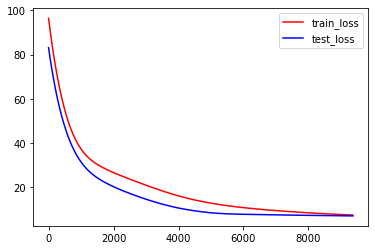

In [95]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(all_train_loss[2000:])), all_train_loss[2000:], color='red',label='train_loss')
plt.plot(np.arange(len(all_test_loss[2000:])), all_test_loss[2000:], color='blue',label='test_loss')
plt.legend()

In [96]:
# 保存模型
torch.save(model, 'model/model.pkl')

In [97]:
#加载模型
net = torch.load("model/model.pkl")

x_data = torch.tensor(X_test[1], dtype=torch.float32)

pred = net.forward(x_data.view(1,-1))

print('预测值：{},真实值：{}'.format(pred.item(),Y_test[1]))

预测值：44.85979080200195,真实值：43.8


## pytorch使用gpu

In [52]:
import torch
import torch.nn as nn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch.nn.functional as f
boston = load_boston()
X = boston.data
Y = boston.target
print(np.shape(X))
print(np.shape(Y))
std = StandardScaler()
X = std.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=66)
print(np.shape(X_train))
print(np.shape(X_test))


(506, 13)
(506,)
(404, 13)
(102, 13)


In [53]:
## 定义模型
class RegressionModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, 100)
        self.linear2 = nn.Linear(100, output_dim)
        
    def forward(self, x):
        x = self.linear(x)
        x = f.relu(x)
        out = self.linear2(x)
        return out
# 模型实例化
input_dim = 13
output_dim = 1
model = RegressionModel(input_dim, output_dim)
print(model)
## 定义损失函数和优化器
learning_rate = 0.0001
criterion = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr = learning_rate)

RegressionModel(
  (linear): Linear(in_features=13, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


In [54]:
# torch.cuda.current_device()

In [55]:
## 和cpu的不同

In [56]:
device = torch.device("cuda:0")

In [57]:
model.to(device)#把我们的模型搬到我们的gpu上

RegressionModel(
  (linear): Linear(in_features=13, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)

In [58]:
inputs = torch.tensor(X_train,dtype=torch.float32)
labels = torch.tensor(Y_train,dtype=torch.float32)

In [59]:
#测试集进行测试
x_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(Y_test, dtype = torch.float32).to(device)

In [60]:
from torch.utils.data import Dataset, DataLoader

In [61]:
### A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.
### The __init__ function is run once when instantiating the Dataset object.
### The __len__ function returns the number of samples in our dataset.
### The __getitem__ function loads and returns a sample from the dataset at the given index idx.

import torch
import numpy as np

#自定义dataset
class myDataset(Dataset):
    #初始化，定义数据内容和标签
    def __init__(self, Data, Label):
        self.Data = Data
        self.Label = Label
    #返回数据集大小
    def __len__(self):
        return len(self.Data)
    #得到数据内容和标签
    def __getitem__(self, index):
        data = torch.Tensor(self.Data[index])
        
        label = torch.Tensor(self.Label[index])
#         label = self.Label[index]

        return data, label

In [62]:
np.shape(labels)

torch.Size([404])

In [63]:
np.shape(inputs)

torch.Size([404, 13])

In [64]:
inputs

tensor([[-0.3725, -0.4877, -0.7203,  ..., -0.4880,  0.1689, -0.8821],
        [-0.4047,  0.0488, -0.7393,  ...,  0.2055,  0.4411,  0.0612],
        [-0.3910, -0.4877, -0.6167,  ..., -0.2569,  0.4411,  2.5451],
        ...,
        [-0.4037, -0.4877, -0.1644,  ..., -0.3031,  0.3818,  0.1341],
        [-0.3835, -0.4877, -0.1805,  ..., -0.0257,  0.3731,  0.7958],
        [-0.2748, -0.4877, -0.4373,  ...,  1.1765,  0.2181,  1.1728]])

In [65]:
dataset = myDataset(inputs,labels)

In [66]:
dataset

In [67]:
len(labels)

404

In [68]:
len(inputs)

404

In [69]:
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  Dataset(*args, **kwds)
 |  
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Method resolution order:
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined 

In [70]:
dataset[1]

(tensor([-0.4047,  0.0488, -0.7393, -0.2726, -1.2586, -0.9839, -1.1299,  1.2849,
         -0.6380, -0.3756,  0.2055,  0.4411,  0.0612]),
 tensor(17.4000))

In [71]:
# help(DataLoader)

In [72]:
#创建DataLoader迭代器
# The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to
# pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to
# speed up data retrieval.
# DataLoader is an iterable that abstracts this complexity for us in an easy API.


dataloader = DataLoader(dataset,batch_size= 404, shuffle = True)


In [73]:
for i,data in dataloader:
    print(i)
    print(data)
    break

tensor([[-0.4102,  0.0488, -0.4767,  ..., -1.5052,  0.4268, -0.0313],
        [ 0.2127, -0.4877,  1.0160,  ...,  0.8066, -0.0152,  0.7117],
        [-0.3577,  0.3707, -1.0457,  ..., -2.5224,  0.3961, -0.4294],
        ...,
        [-0.4046, -0.4877, -0.0798,  ...,  0.0668,  0.4411, -0.2499],
        [ 1.9903, -0.4877,  1.0160,  ...,  0.8066,  0.1485,  1.4980],
        [ 0.4553, -0.4877,  1.0160,  ...,  0.8066, -0.5752,  0.9331]])
tensor([22.9000, 15.2000, 33.8000, 21.9000, 23.7000, 19.6000, 31.2000, 13.8000,
        15.4000, 19.4000, 22.3000,  5.0000, 15.2000,  8.4000, 17.2000, 19.9000,
        31.5000, 14.1000,  5.0000, 37.6000, 20.1000, 22.5000, 33.2000, 12.1000,
        37.3000, 23.3000, 17.2000, 12.7000, 23.3000, 24.4000, 23.1000, 20.0000,
        28.2000, 43.1000, 13.5000, 21.6000, 20.3000, 22.3000, 24.4000, 31.7000,
        24.2000, 30.1000, 11.9000,  7.2000, 29.9000,  8.7000, 18.8000, 28.1000,
        18.6000, 22.2000,  7.2000, 14.5000, 24.7000, 21.8000, 18.5000, 26.6000,
      

In [74]:
print(np.shape(X_train))

(404, 13)


In [75]:
epochs = 20000
test_min_loss = 1000000
train_loss_epoch = []
all_train_loss = [] #训练集的损失
all_test_loss = [] #测试集的损失


for epoch in range(epochs):
    
    for i,data in enumerate(dataloader):
        #每次取一个batch的数据
        
        inputs = data[0].to(device)
        labels = data[1].to(device)
        
        #前向传播
        outputs = model(inputs)

        #计算loss

        loss = criterion(outputs, labels.view(-1,1))
        train_loss_epoch.append(loss.item())
    all_train_loss.append(np.mean(train_loss_epoch))

    train_loss_epoch = []
    #测试集合
    pred = model.forward(x_test)
    test_loss = criterion(pred, y_test.view(-1,1))
    all_test_loss.append(test_loss.item())

    if test_min_loss > test_loss.item():
        test_min_loss = test_loss.item()
    else:
        print(f'程序结束时的测试数据的最小loss:{test_min_loss},当前模型测试数据的loss:{test_loss.item()}')
        break
    if epoch % 100 == 0:
        
#             print('epoch {}, train_loss {},test_loss {}'.format(epoch, loss.item(),loss_test.item()))
        print(f'epoch: {epoch}, train_loss: {loss.item()}, test_loss: {test_loss.item()}')
    #梯度清零
    optimizer.zero_grad()

    #反向传播
    loss.backward()

    #更新参数
    optimizer.step()

epoch: 0, train_loss: 590.0119018554688, test_loss: 598.526611328125
epoch: 100, train_loss: 572.8847045898438, test_loss: 581.20703125
epoch: 200, train_loss: 554.7254638671875, test_loss: 562.5958862304688
epoch: 300, train_loss: 534.3814697265625, test_loss: 541.3439331054688
epoch: 400, train_loss: 511.1004333496094, test_loss: 516.6636352539062
epoch: 500, train_loss: 484.68017578125, test_loss: 488.28509521484375
epoch: 600, train_loss: 455.42742919921875, test_loss: 456.72467041015625
epoch: 700, train_loss: 423.954833984375, test_loss: 422.704833984375
epoch: 800, train_loss: 390.8010559082031, test_loss: 386.9188232421875
epoch: 900, train_loss: 356.8375244140625, test_loss: 350.3215637207031
epoch: 1000, train_loss: 322.8125, test_loss: 313.7041320800781
epoch: 1100, train_loss: 289.3156433105469, test_loss: 277.7528076171875
epoch: 1200, train_loss: 256.9112854003906, test_loss: 243.16934204101562
epoch: 1300, train_loss: 226.19161987304688, test_loss: 210.67051696777344
epo

In [76]:
input_ = torch.tensor(X_test[5],dtype=torch.float32).view(1,-1)
print(model(input_.to(device)))
print(Y_test[5])

tensor([[19.1190]], device='cuda:0', grad_fn=<AddmmBackward0>)
19.9


In [77]:
input_ = torch.tensor(X_test,dtype=torch.float32)
predicts = model(input_.to(device))

In [78]:
from sklearn.metrics import r2_score
r2_score(predicts.detach().cpu().numpy(),Y_test)

0.913109480680748

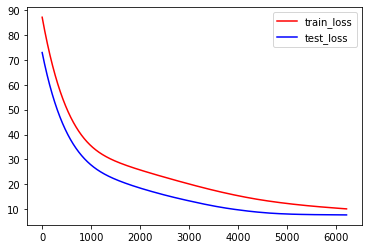

In [79]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(all_train_loss[2000:])), all_train_loss[2000:], color='red',label='train_loss')
plt.plot(np.arange(len(all_test_loss[2000:])), all_test_loss[2000:], color='blue',label='test_loss')
plt.legend()

In [80]:
torch.save(model, 'model/model.pkl')

In [81]:
#加载模型
net = torch.load("model/model.pkl")

x_data = torch.tensor(X_test[1], dtype=torch.float32)

pred = net.forward(x_data.view(1,-1).to(device))

print('预测值：{},真实值：{}'.format(pred.item(),Y_test[1]))

预测值：44.171424865722656,真实值：43.8
